In [21]:
import numpy as np
import matplotlib.pyplot as plt
from get_online_results import EvaluatorOnline
from get_offline_results import EvaluatorOffline

XSMALL_SIZE = 14
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [22]:
# online
dir_ = "../../results/"
data_names = ["BNG_wisconsin", "BNG_cpu_act", "BNG_auto_price", "black_friday", "ds_5", "zurich"]
# data_names = ["black_friday"]

bars_cats = [0] * len(data_names)
bars_tree = [0] * len(data_names)
bars_lin = [0] * len(data_names)
y_cats = [ [0] * len(data_names) for i in range(2) ]
y_tree = [ [0] * len(data_names) for i in range(2) ]
y_lin = [ [0] * len(data_names) for i in range(2) ]

for i, name in enumerate(data_names):
    print(name)
    data_file = dir_ + name + "_online_validation.txt"
    online_results = EvaluatorOnline(data_file, 0.05, False)
    online_results.eval()
    bars_cats[i], y_cats[0][i], y_cats[1][i] = online_results.return_loss("cats")
    bars_tree[i], y_tree[0][i], y_tree[1][i] = online_results.return_loss("disc_tree")
    bars_lin[i], y_lin[0][i], y_lin[1][i] = online_results.return_loss("disc_linear")


BNG_wisconsin
model, n, h, loss, time = cats, 4.0, 1.0, 0.240446, 5.6
model, n, h, loss, time = cats, 8.0, 1.0, 0.198868, 6.57
model, n, h, loss, time = cats, 8.0, 2.0, 0.222735, 5.89
model, n, h, loss, time = cats, 16.0, 1.0, 0.192508, 8.18
model, n, h, loss, time = cats, 16.0, 2.0, 0.197387, 10.69
model, n, h, loss, time = cats, 16.0, 4.0, 0.215877, 8.51
model, n, h, loss, time = cats, 32.0, 1.0, 0.201209, 11.09
model, n, h, loss, time = cats, 32.0, 2.0, 0.188503, 12.85
model, n, h, loss, time = cats, 32.0, 4.0, 0.192799, 15.68
model, n, h, loss, time = cats, 32.0, 8.0, 0.211517, 9.33
model, n, h, loss, time = cats, 64.0, 1.0, 0.202885, 14.92
model, n, h, loss, time = cats, 64.0, 2.0, 0.188466, 19.56
model, n, h, loss, time = cats, 64.0, 4.0, 0.185859, 16.4
model, n, h, loss, time = cats, 64.0, 8.0, 0.188952, 20.58
model, n, h, loss, time = cats, 64.0, 16.0, 0.208764, 11.79
model, n, h, loss, time = cats, 128.0, 1.0, 0.205108, 17.07
model, n, h, loss, time = cats, 128.0, 2.0, 0.1881,

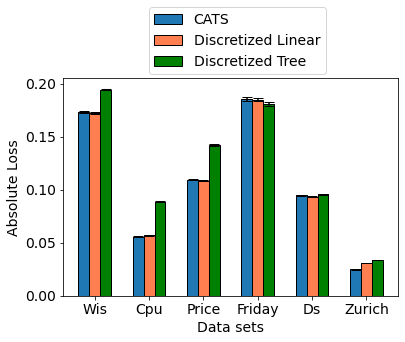

In [23]:
# online
# width of the bars
barWidth = 0.2
 
yer_cats = (list(np.subtract(bars_cats, y_cats[0]).transpose()), list(np.subtract(y_cats[1], bars_cats).transpose()))
yer_tree = (list(np.subtract(bars_tree, y_tree[0]).transpose()), list(np.subtract(y_tree[1], bars_tree).transpose()))
yer_lin = (list(np.subtract(bars_lin, y_lin[0]).transpose()), list(np.subtract(y_lin[1], bars_lin).transpose()))

# The x position of bars
r1 = np.arange(len(bars_cats))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]

# Create blue bars
plt.bar(r1, bars_cats, width = barWidth, edgecolor = 'black', yerr=yer_cats, capsize=5, label='CATS')
 
# Create cyan bars
plt.bar(r2, bars_lin, width = barWidth, color = 'coral', edgecolor = 'black', yerr=yer_lin, capsize=5, label='Discretized Linear')

# Create red bars
plt.bar(r3, bars_tree, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer_tree, capsize=5, label='Discretized Tree')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars_cats))], ['Wis', 'Cpu','Price','Friday', 'Ds', 'Zurich'])
plt.ylabel('Absolute Loss')
plt.xlabel('Data sets')
plt.legend(loc='upper center', bbox_to_anchor= (0.52, 1.36))

# plt.grid()
# Show graphic
fig = plt.gcf()
plt.show()
fig.savefig(dir_ + 'abs_online.png',bbox_inches='tight')

In [24]:
# offline
dir_ = "../../results/"
data_names = ["BNG_wisconsin", "BNG_cpu_act", "BNG_auto_price", "black_friday", "ds_5", "zurich"]
# data_names = ["black_friday"]

bars_init = [0] * len(data_names)
bars_opt = [0] * len(data_names)
y_init = [ [0] * len(data_names) for i in range(2) ]
y_opt = [ [0] * len(data_names) for i in range(2) ]

for i, name in enumerate(data_names):
    print(name)
    srm_file = dir_ + name + "_offline_srm.txt"
    test_file = dir_ + name + "_offline_test.txt"
    offline_results = EvaluatorOffline(srm_file, test_file, 0.1, 0.05, True)
    offline_results.eval()
    bars_init[i], y_init[0][i], y_init[1][i] = offline_results.return_loss("init")
    bars_opt[i], y_opt[0][i], y_opt[1][i] = offline_results.return_loss("opt")
    print(bars_opt[i])
        


BNG_wisconsin
0.17291528372268655
BNG_cpu_act
0.05281622603481378
BNG_auto_price
0.10870415038260625
black_friday
0.17830500708561633
ds_5
0.08526858097278117
zurich
0.024476349538704794


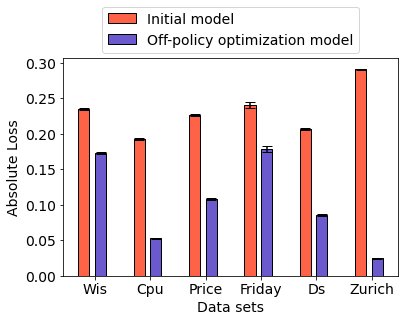

In [25]:
# offline
# width of the bars
barWidth = 0.2

yer_init = (list(np.subtract(bars_init, y_init[0]).transpose()), list(np.subtract(y_init[1], bars_init).transpose()))
yer_opt = (list(np.subtract(bars_opt, y_opt[0]).transpose()), list(np.subtract(y_opt[1], bars_opt).transpose()))

# The x position of bars
r1 = np.arange(len(bars_init))
r2 = [x + 1.5*barWidth for x in r1]

# Create blue bars
plt.bar(r1, bars_init, width = barWidth, color = 'tomato', edgecolor = 'black', yerr=yer_init, capsize=5, label='Initial model')
 
# Create cyan bars
plt.bar(r2, bars_opt, width = barWidth, color = 'slateblue', edgecolor = 'black', yerr=yer_opt, capsize=5, label='Off-policy optimization model')


# general layout
plt.xticks([r + barWidth for r in range(len(bars_init))], ['Wis', 'Cpu','Price','Friday', 'Ds', 'Zurich'])
plt.ylabel('Absolute Loss')
plt.xlabel('Data sets')
plt.legend(loc='upper center', bbox_to_anchor= (0.5, 1.27))

# plt.grid()
# Show graphic
fig = plt.gcf()
plt.show()
fig.savefig(dir_ + 'abs_offline_srm.png',bbox_inches='tight')

[4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0]


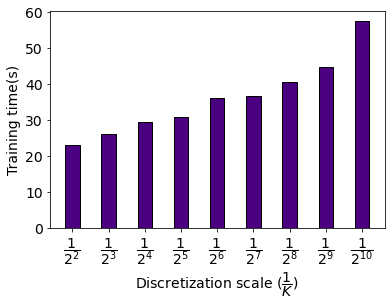

In [26]:
# time 1
# width of the bars
barWidth = 0.4
 
name = "zurich"
n = 0
hp = 1
h = 1/4
data_file = dir_ + name + "_online_validation.txt"
online_results = EvaluatorOnline(data_file, 0.05, True)
online_results.eval()
bars1, k_ = online_results.getTime("cats", n, hp, h, "h")
print(k_)

bars1 = bars1[:9]
# The x position of bars
r1 = np.arange(len(bars1))

# Create blue bars
plt.bar(r1+barWidth, bars1, width = barWidth, color = 'indigo', edgecolor = 'black', label='Time(s)')
 

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['$\dfrac{1}{2^2}$','$\dfrac{1}{2^3}$','$\dfrac{1}{2^4}$','$\dfrac{1}{2^5}$','$\dfrac{1}{2^6}$','$\dfrac{1}{2^7}$',\
                                                       '$\dfrac{1}{2^8}$','$\dfrac{1}{2^9}$', '$\dfrac{1}{2^{10}}$', '$\dfrac{1}{2^{11}}$', '$\dfrac{1}{2^{12}}$', '$\dfrac{1}{2^{13}}$'])
plt.ylabel('Training time(s)')
plt.xlabel('Discretization scale ($\dfrac{1}{K}$)')
# plt.legend(loc='upper center', bbox_to_anchor= (0.5, 1.18))

# plt.grid()
# Show graphic
fig = plt.gcf()
plt.show()
fig.savefig(dir_ + 'timen.png',bbox_inches='tight')

[  1.22070312e-04   2.44140625e-04   4.88281250e-04   9.76562500e-04
   1.95312500e-03   3.90625000e-03   7.81250000e-03   1.56250000e-02
   3.12500000e-02   6.25000000e-02   1.25000000e-01   2.50000000e-01]


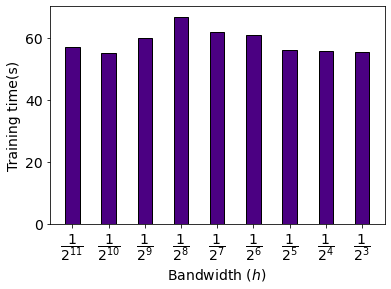

In [27]:
# time 2
# width of the bars
barWidth = 0.4

name = "zurich"
n = 8192
hp = 0
h = 0
data_file = dir_ + name + "_online_validation.txt"
online_results = EvaluatorOnline(data_file, 0.05, True)
online_results.eval()
bars1, h_ = online_results.getTime("cats", n, hp, h, "n")
print(h_ / (np.ones(len(h_)) * n))
 
# The x position of bars
bars1 = bars1[2:11]
r1 = np.arange(len(bars1))

# Create blue bars
plt.bar(r1+barWidth, bars1, width = barWidth, color = 'indigo', edgecolor = 'black', label='Time(s)')
 

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['$\dfrac{1}{2^{11}}$','$\dfrac{1}{2^{10}}$','$\dfrac{1}{2^{9}}$','$\dfrac{1}{2^{8}}$',\
                                                       '$\dfrac{1}{2^{7}}$','$\dfrac{1}{2^{6}}$', '$\dfrac{1}{2^{5}}$','$\dfrac{1}{2^{4}}$','$\dfrac{1}{2^{3}}$','$\dfrac{1}{2^{2}}$'])
plt.ylabel('Training time(s)')
plt.xlabel('Bandwidth ($h$)')
# plt.legend(loc='upper center', bbox_to_anchor= (0.5, 1))

# plt.grid()
# Show graphic
fig = plt.gcf()
plt.show()
fig.savefig(dir_ + 'timeh.png',bbox_inches='tight')

[4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0]
[2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0]


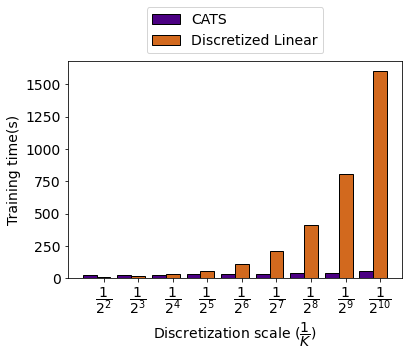

In [28]:
# time 3 
# width of the bars
barWidth = 0.4

name = "zurich"
n = 0
hp = 0
h = 1/4
data_file = dir_ + name + "_online_validation.txt"
online_results = EvaluatorOnline(data_file, 0.05, True)
online_results.eval()
bars1, k_ = online_results.getTime("cats", n, hp, h, "h")
print(k_)
n = 0
hp = 0
h = 0
bars2, k_2 = online_results.getTime("disc_linear", n, hp, h, "hp")
print(k_2)


bars1 = bars1[0:9]
bars2 = bars2[1:10]
k_2 = k_2[1:10]


# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'indigo', edgecolor = 'black', label='CATS')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'chocolate', edgecolor = 'black', label='Discretized Linear')


# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['$\dfrac{1}{2^2}$','$\dfrac{1}{2^3}$','$\dfrac{1}{2^4}$','$\dfrac{1}{2^5}$','$\dfrac{1}{2^6}$','$\dfrac{1}{2^7}$','$\dfrac{1}{2^8}$','$\dfrac{1}{2^9}$'
                                                      ,'$\dfrac{1}{2^{10}}$','$\dfrac{1}{2^{11}}$','$\dfrac{1}{2^{12}}$', '$\dfrac{1}{2^{13}}$'])
plt.ylabel('Training time(s)')
plt.xlabel('Discretization scale ($\dfrac{1}{K}$)')
plt.legend(loc='upper center', bbox_to_anchor= (0.5, 1.28))

# plt.grid()
# Show graphic
fig = plt.gcf()
plt.show()
fig.savefig(dir_ + 'timenn.png',bbox_inches='tight')